# V0.1.6 - Using the Accelerated Orthogonal Least-Squares algorithm for building Polynomial NARX models

Example created by Wilson Rocha Lacerda Junior

In [1]:
from sysidentpy.polynomial_basis import AOLS
from sysidentpy.utils.generate_data import get_siso_data
from sysidentpy.metrics import root_relative_squared_error
import pandas as pd
import matplotlib.pyplot as plt

x_train, x_test, y_train, y_test = get_siso_data(
    n=1000, colored_noise=False, sigma=0.001, train_percentage=90
)

model = AOLS(
    xlag=3,
    ylag=3,
    non_degree=2,
    n_inputs=1,
    k=5,
    l=1,
)

In [2]:

model.fit(x_train, y_train)

In [3]:
yhat = model.predict(x_test, y_test)
rrse = root_relative_squared_error(y_test, yhat)

results = pd.DataFrame(
    model.results(err_precision=8, dtype="dec"),
    columns=["Regressors", "Parameters", "ERR"],
)
print(rrse, '\n', results)

0.0017537746480971851 
       Regressors Parameters         ERR
0         y(k-1)     0.1999  0.00000000
1        x1(k-2)     0.9000  0.00000000
2  x1(k-1)y(k-1)     0.1001  0.00000000


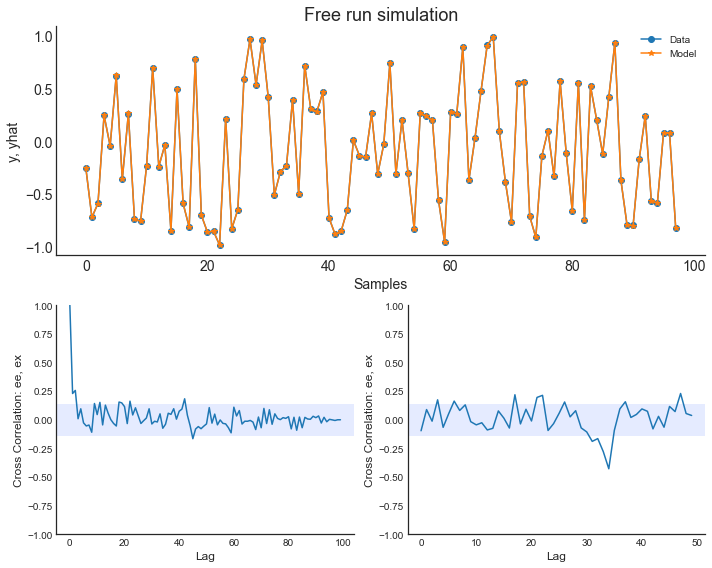

In [4]:
ee, ex, extras, lam = model.residuals(x_test, y_test, yhat)
model.plot_result(y_test, yhat, ee, ex, n=100)